In [2]:
from utils import *

import torchvision.transforms.v2 as transforms_v2

from dataset import AngioDataset

%load_ext autoreload
%autoreload 2

In [ ]:
datapath = '/grolen(self.samples)up/dl4miacourse/The_Segmenters/Data/'
filepath = datapath + 'ch-1_subv.h5'

In [ ]:
filepath[:-3]

In [ ]:
dummy = np.ones((3,3))

In [ ]:
save_h5(dummy, 'key', datapath + 'dummy.h5')

In [24]:
import torchvision.transforms.v2 as transforms_v2
from customtransform import DiscreteRotateTransform

train_data_aug = AngioDataset("train", transform = transforms_v2.Compose([transforms_v2.RandomHorizontalFlip(0.5), transforms_v2.RandomVerticalFlip(0.5),  DiscreteRotateTransform([0,90,180,270])]))


In [25]:
train_data = AngioDataset("train")



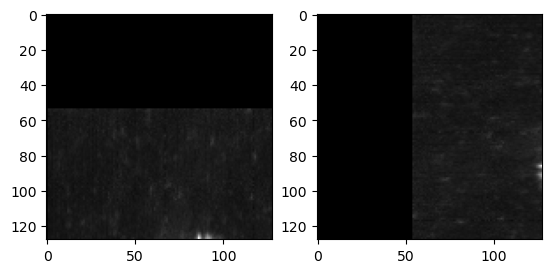

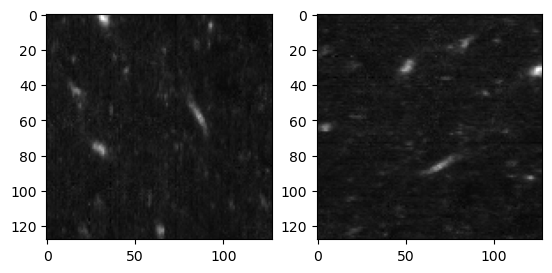

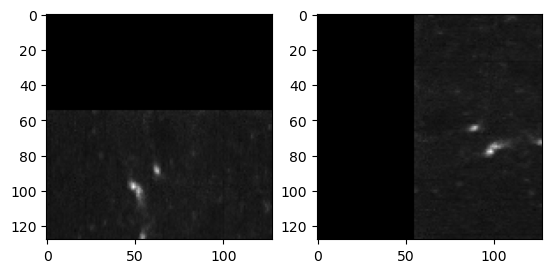

In [26]:
for id in [0,10,20]:
    img2, mask = train_data[id]
    img1, mask = train_data_aug[id]
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img1[0], cmap = 'gray')
    ax[1].imshow(img2[0], cmap = 'gray')

    plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(mask.numpy().squeeze())

In [ ]:
patch_idx = [1,1,1]
patch_size = [1,2,2]

d = np.arange(9).reshape(1,3,3)
    


In [ ]:
d

In [ ]:
patch_list = []
n = get_n_patch_per_dim(d.shape,patch_size)
for idx in range(np.prod(n)):
    patch_idx = np.unravel_index(idx,n)
    print(patch_idx)
    patch_list.append(get_patch(d, patch_idx,patch_size))

In [ ]:
patch_list

In [ ]:
len(np.split(d,patch_size))

In [ ]:
val_dataset.vol.shape

In [ ]:
val_filepath = "val"
val_dataset = AngioDataset(val_filepath, patch_size=[1, 128, 128])
print(len(val_dataset))


imgs = []
slices = []
for i in range(len(val_dataset)):
    img, mask, npslice = val_dataset[i]
    imgs.append(img)
    slices.append(npslice)

vol = repatch(imgs, slices, val_dataset.vol.shape)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
vol.shape

In [ ]:
from dataset import AngioDataset
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from unet import UNet

from utils import *
from test import *

checkpoint_path = '/group/dl4miacourse/The_Segmenters/Checkpoints'

checkpoint_key = '009'
save_path = '/group/dl4miacourse/The_Segmenters/Predictions/' + checkpoint_key

final_activation = "Sigmoid"

patch_dim = 512
patch_size = [1,patch_dim,patch_dim]


model = UNet(depth=4, in_channels=1, out_channels=1, final_activation=final_activation)
model = load_checkpoint(model, checkpoint_path, optimizer=None, key='checkpoint' + checkpoint_key)

test_dataset = AngioDataset('test',patch_size=patch_size)
test_loader = DataLoader(test_dataset, batch_size=1)
vol = test_repatch(model, test_loader, saving_path = save_path)

In [ ]:
plt.imshow(vol[0,...])

In [2]:
from utils import compute_receptive_field

c = compute_receptive_field(4,3,2)

In [3]:
c

164.0